In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_decision_regions

In [26]:
df = sns.load_dataset('iris')

In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [16]:
enc = LabelEncoder()
df['species'] = enc.fit_transform(df['species'])

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
df = df[['sepal_length', 'petal_length', 'species']]
df

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [19]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [21]:
lr = LogisticRegression(multi_class="ovr")

In [22]:
lr.fit(X_train, Y_train)

C:\Users\Atharva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'ovr'


In [23]:
y_pred = lr.predict(X_test)

In [28]:
print(accuracy_score(Y_test, y_pred))

0.9666666666666667


In [30]:
pd.DataFrame(confusion_matrix(Y_test, y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [32]:
query = np.array([[3.4, 2.7]])
lr.predict_proba(query)

array([[0.44391859, 0.55507579, 0.00100562]])

In [33]:
lr.predict(query)

array([1])

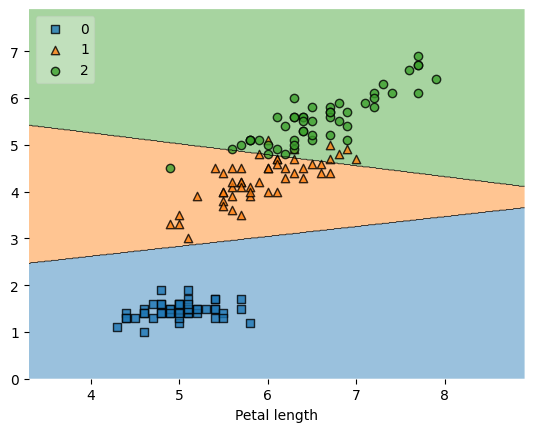

In [37]:
plot_decision_regions(X, y, lr, legend=2)

plt.xlabel('Sepal length')
plt.xlabel('Petal length')

plt.show()